In [820]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

In [821]:
goalies = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/linear_reg_csv_files/goalies_lr.csv')

In [822]:
goalies_to_predict = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/linear_reg_csv_files/goalies_pred.csv')
goalies_to_predict.drop(columns=['Unnamed: 0'])
goalies_rec = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/goalies_rec.csv')

In [823]:
goalies.head(50)

,Unnamed: 0,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,CAP HIT
0,1,"Allen, Jake",454.0,0.908,206.0,181.0,1176.0,12729.0,28.0,25626.0,"$5,850,000"
1,2,"Andersen, Frederik",509.0,0.916,304.0,132.0,1248.0,14802.0,28.0,29401.0,"$5,400,000"
2,3,"Annunen, Justus",44.0,0.901,24.0,14.0,113.0,1142.0,2.0,2375.0,"$837,500"
3,4,"Askarov, Yaroslav",16.0,0.899,5.0,7.0,43.0,427.0,0.0,857.0,"$925,000"
4,5,"Binnington, Jordan",326.0,0.906,165.0,115.0,880.0,9392.0,18.0,18868.0,"$6,000,000"
5,9,"Blackwood, Mackenzie",243.0,0.906,99.0,98.0,676.0,7188.0,13.0,13691.0,"$4,350,000"
6,11,"Bobrovsky, Sergei",745.0,0.914,424.0,240.0,1849.0,21594.0,48.0,42978.0,"$10,000,000"
7,20,"Comrie, Eric",73.0,0.898,31.0,34.0,216.0,2110.0,3.0,4093.0,"$3,000,00"
8,21,"Copley, Pheonix",77.0,0.898,44.0,17.0,202.0,1988.0,4.0,4261.0,"$1,000,000"
9,24,"Daccord, Joey",114.0,0.908,44.0,45.0,293.0,3165.0,4.0,6436.0,"$1,200,000"


In [824]:
# Display basic information about the DataFrame
goalies.info()

# Display summary statistics
goalies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  69 non-null     int64  
 1   name        69 non-null     object 
 2   GP          69 non-null     float64
 3   SV%_x       69 non-null     float64
 4   W           69 non-null     float64
 5   L           69 non-null     float64
 6   GA          69 non-null     float64
 7   SOG         69 non-null     float64
 8   SO          69 non-null     float64
 9   TIME        69 non-null     float64
 10  CAP HIT     69 non-null     object 
dtypes: float64(8), int64(1), object(2)
memory usage: 6.1+ KB


,Unnamed: 0,GP,SV%_x,W,L,GA,SOG,SO,TIME
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000
mean,62.043478,223.217391,0.905159,108.724638,78.826087,579.26087,6377.884058,12.898551,12639.144928
std,35.111769,200.263860,0.008759,106.530427,69.275443,498.76296,5774.962145,14.753011,11557.487403
min,1.000000,15.000000,0.877000,5.000000,7.000000,43.00000,427.000000,0.000000,857.000000
25%,33.000000,84.000000,0.901000,39.000000,32.000000,227.00000,2288.000000,3.000000,4655.000000
50%,61.000000,164.000000,0.906000,72.000000,55.000000,431.00000,4615.000000,7.000000,9011.000000
75%,94.000000,281.000000,0.910000,148.000000,97.000000,725.00000,8078.000000,16.000000,15953.000000
max,121.000000,1047.000000,0.918000,573.000000,337.000000,2622.00000,29745.000000,76.000000,60531.000000


In [825]:
# Remove NaN from salary and predict on them after the model is built
goalies = goalies.dropna(subset=['CAP HIT'])

In [826]:
# Change CAP HIT to a float and name is salary
goalies = goalies.rename(columns={'CAP HIT': 'salary'})

# Strip the $
goalies['salary'] = goalies['salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [827]:
goalies.describe()

,Unnamed: 0,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,6.900000e+01
mean,62.043478,223.217391,0.905159,108.724638,78.826087,579.26087,6377.884058,12.898551,12639.144928,3.393394e+06
std,35.111769,200.263860,0.008759,106.530427,69.275443,498.76296,5774.962145,14.753011,11557.487403,2.428647e+06
min,1.000000,15.000000,0.877000,5.000000,7.000000,43.00000,427.000000,0.000000,857.000000,3.000000e+05
25%,33.000000,84.000000,0.901000,39.000000,32.000000,227.00000,2288.000000,3.000000,4655.000000,1.000000e+06
50%,61.000000,164.000000,0.906000,72.000000,55.000000,431.00000,4615.000000,7.000000,9011.000000,2.900000e+06
75%,94.000000,281.000000,0.910000,148.000000,97.000000,725.00000,8078.000000,16.000000,15953.000000,5.000000e+06
max,121.000000,1047.000000,0.918000,573.000000,337.000000,2622.00000,29745.000000,76.000000,60531.000000,1.000000e+07


In [828]:
goalies = goalies.drop(columns=['Unnamed: 0',])
goalies.head()

,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
0,"Allen, Jake",454.0,0.908,206.0,181.0,1176.0,12729.0,28.0,25626.0,5850000.0
1,"Andersen, Frederik",509.0,0.916,304.0,132.0,1248.0,14802.0,28.0,29401.0,5400000.0
2,"Annunen, Justus",44.0,0.901,24.0,14.0,113.0,1142.0,2.0,2375.0,837500.0
3,"Askarov, Yaroslav",16.0,0.899,5.0,7.0,43.0,427.0,0.0,857.0,925000.0
4,"Binnington, Jordan",326.0,0.906,165.0,115.0,880.0,9392.0,18.0,18868.0,6000000.0


In [829]:
games_played = goalies.groupby(by=['GP', 'name'], ).sum()
# Sort the resulting DataFrame by 'GP' in descending order
games_played_sorted = games_played.sort_values(by='GP', ascending=True)

games_played.head()

,,SV%_x,W,L,GA,SOG,SO,TIME,salary
GP,name,,,,,,,,
15.0,"Greaves, Jet",0.910,5.0,8.0,48.0,535.0,0.0,877.0,850000.0
16.0,"Askarov, Yaroslav",0.899,5.0,7.0,43.0,427.0,0.0,857.0,925000.0
19.0,"Silovs, Arturs",0.880,8.0,8.0,57.0,474.0,0.0,1092.0,850000.0
24.0,"Fedotov, Ivan",0.877,5.0,12.0,70.0,569.0,0.0,1289.0,950000.0
39.0,"Levi, Devon",0.894,17.0,17.0,121.0,1146.0,0.0,2205.0,925000.0


In [830]:
# Define the function to assign salary based on games played
def assign_salary(gp):
    if gp <= 50:
        return 900000
    elif gp <= 100:
        return 2000000
    elif gp <= 150:
        return 3000000
    elif gp <= 200:
        return 5000000
    elif gp <= 300:
        return 8000000
    elif gp <= 400:
        return 9000000
    elif gp > 401:
        return 10000000
    else:
        return 0  # Default value if GP is greater than 200

# Apply the function to the 'GP' column to create the 'salary' column
goalies['salary'] = goalies['GP'].apply(assign_salary)
goalies.head(50)

,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
0,"Allen, Jake",454.0,0.908,206.0,181.0,1176.0,12729.0,28.0,25626.0,10000000
1,"Andersen, Frederik",509.0,0.916,304.0,132.0,1248.0,14802.0,28.0,29401.0,10000000
2,"Annunen, Justus",44.0,0.901,24.0,14.0,113.0,1142.0,2.0,2375.0,900000
3,"Askarov, Yaroslav",16.0,0.899,5.0,7.0,43.0,427.0,0.0,857.0,900000
4,"Binnington, Jordan",326.0,0.906,165.0,115.0,880.0,9392.0,18.0,18868.0,9000000
5,"Blackwood, Mackenzie",243.0,0.906,99.0,98.0,676.0,7188.0,13.0,13691.0,8000000
6,"Bobrovsky, Sergei",745.0,0.914,424.0,240.0,1849.0,21594.0,48.0,42978.0,10000000
7,"Comrie, Eric",73.0,0.898,31.0,34.0,216.0,2110.0,3.0,4093.0,2000000
8,"Copley, Pheonix",77.0,0.898,44.0,17.0,202.0,1988.0,4.0,4261.0,2000000
9,"Daccord, Joey",114.0,0.908,44.0,45.0,293.0,3165.0,4.0,6436.0,3000000


In [831]:
# Merge the DataFrames on a common key (e.g., 'player_id' or 'name')
goalies_df = goalies_to_predict.merge(goalies[['name', 'salary']], on='name', how='left', suffixes=('', '_drop'))

# Drop the duplicate columns if they exist
goalies_df = goalies_df.loc[:, ~goalies_df.columns.str.endswith('_drop')]

# Display the first few rows of the updated DataFrame
goalies_df.drop(columns=['Unnamed: 0'])

,name,GP,W,L,GA,SOG,SO,TIME,salary
0,"Dell, Aaron",130,50,50,335,3518.0,5,6873,NaN
1,"Hill, Adin",176,88,62,431,4744.0,11,9782,5000000.0
2,"Schmid, Akira",44,14,18,99,991.0,1,2084,900000.0
3,"Montoya, Al",168,67,49,405,4418.0,7,9169,NaN
4,"Auld, Alex",237,91,88,606,6293.0,6,12986,NaN
...,...,...,...,...,...,...,...,...,...
204,"Fasth, Viktor",63,26,26,161,1682.0,4,3465,NaN
205,"Husso, Ville",143,70,46,408,4108.0,7,8009,3000000.0
206,"Vanecek, Vitek",183,95,53,478,4930.0,10,10231,5000000.0
207,"Danis, Yann",55,17,22,127,1381.0,3,2732,NaN


In [832]:
# Define the function to assign salary based on games played
def assign_salary(gp):
    if gp <= 50:
        return 900000
    elif gp <= 100:
        return 2000000
    elif gp <= 150:
        return 3000000
    elif gp <= 200:
        return 5000000
    elif gp <= 300:
        return 8000000
    elif gp <= 400:
        return 9000000
    elif gp > 401:
        return 10000000
    else:
        return 0  # Default value if GP is greater than 200

# Apply the function to the 'GP' column to create the 'salary' column
goalies_df['salary'] = goalies_df['GP'].apply(assign_salary)
goalies_df.drop(columns=['Unnamed: 0'])

,name,GP,W,L,GA,SOG,SO,TIME,salary
0,"Dell, Aaron",130,50,50,335,3518.0,5,6873,3000000
1,"Hill, Adin",176,88,62,431,4744.0,11,9782,5000000
2,"Schmid, Akira",44,14,18,99,991.0,1,2084,900000
3,"Montoya, Al",168,67,49,405,4418.0,7,9169,5000000
4,"Auld, Alex",237,91,88,606,6293.0,6,12986,8000000
...,...,...,...,...,...,...,...,...,...
204,"Fasth, Viktor",63,26,26,161,1682.0,4,3465,2000000
205,"Husso, Ville",143,70,46,408,4108.0,7,8009,3000000
206,"Vanecek, Vitek",183,95,53,478,4930.0,10,10231,5000000
207,"Danis, Yann",55,17,22,127,1381.0,3,2732,2000000


In [833]:
#goalies_rec = goalies_rec.drop(columns=['Unnamed: 0'])

# Split the name_x column into first_name and last_name
def split_name(name):
    parts = name.split()
    if len(parts) > 1:
        return parts[-1], ' '.join(parts[:-1])
    else:
        return parts[0], ''

goalies_rec[['last_name', 'first_name']] = goalies_rec['name'].apply(lambda x: pd.Series(split_name(x)))

# Combine last_name and first_name into a single column with the format "Last, First"
goalies_rec['name'] = goalies_rec['last_name'] + ', ' + goalies_rec['first_name']

# Drop the temporary first_name and last_name columns
goalies_rec = goalies_rec.drop(columns=['first_name', 'last_name', 'Unnamed: 0'])

# Display the first few rows of the DataFrame to verify the change
goalies_rec

,name,icetime,x_goals,goals,unblocked_shot_attempts,x_rebounds,rebounds,x_freeze,freeze,x_on_goal,...,low_danger_x_goals,medium_danger_x_goals,high_danger_x_goals,low_danger_goals,medium_danger_goals,high_danger_goals,blocked_shot_attempts,penalty_minutes,penalties,position
0,"Dell, Aaron",3163.584615,2.471077,2.576923,49.930769,1.858538,2.153846,6.056308,5.707692,26.658000,...,0.791615,0.956769,0.722692,0.807692,1.069231,0.700000,12.715385,0.015385,0.007692,G
1,"Hill, Adin",3327.886364,2.543636,2.465909,54.869318,1.929659,2.568182,6.773750,6.159091,28.386989,...,0.872784,0.863693,0.807159,0.931818,0.869318,0.664773,15.335227,0.045455,0.022727,G
2,"Schmid, Akira",2843.045455,2.172727,2.250000,42.045455,1.566364,2.295455,5.388409,4.704545,23.007727,...,0.672955,0.837727,0.662273,0.522727,1.204545,0.522727,10.477273,0.045455,0.022727,G
3,"Montoya, Al",3267.851190,2.409405,2.410714,49.755952,1.798690,1.869048,5.885357,6.315476,26.022202,...,0.811131,0.856905,0.741369,0.851190,0.946429,0.613095,13.035714,0.071429,0.035714,G
4,"Kolosov, Aleksei",3132.400000,2.621333,3.000000,53.933333,1.762000,2.466667,6.290000,4.333333,26.505333,...,0.841333,0.852000,0.928000,1.133333,0.533333,1.333333,17.533333,0.000000,0.000000,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"Fasth, Viktor",3300.603175,2.394444,2.555556,52.396825,1.914444,1.904762,6.357143,6.444444,27.441746,...,0.842222,0.920952,0.631587,1.047619,0.761905,0.746032,13.714286,0.000000,0.000000,G
212,"Husso, Ville",3375.676056,2.708380,2.859155,54.859155,2.054296,2.661972,6.910915,5.809859,29.534296,...,0.914437,0.936761,0.857113,1.246479,0.943662,0.669014,13.845070,0.028169,0.021127,G
213,"Vanecek, Vitek",3353.813187,2.468736,2.609890,51.648352,1.899615,2.379121,6.478132,4.774725,27.622912,...,0.790495,0.873077,0.805110,0.851648,0.945055,0.813187,13.263736,0.010989,0.005495,G
214,"Danis, Yann",2964.020408,2.386939,2.306122,48.306122,1.730408,1.673469,5.580408,5.653061,25.137347,...,0.753061,0.819796,0.813878,0.795918,0.693878,0.816327,12.938776,0.000000,0.000000,G


In [ ]:
# Merge the DataFrames on the 'name' column, keeping only the 'salary' column from goalies_df
goalies_df_salary = goalies_rec.merge(goalies_df[['name', 'salary']], on='name', how='left', suffixes=('', '_drop'))

# Drop the duplicate columns if they exist
goalies_df_salary = goalies_df_salary.loc[:, ~goalies_df_salary.columns.str.endswith('_drop')]

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in goalies_df_salary.columns:
    goalies_df_salary = goalies_df_salary.drop(columns=['Unnamed: 0'])



In [857]:
# Split the 'name' column in goalies_df_salary into 'first_name' and 'last_name'
goalies_df_salary[['last_name', 'first_name']] = goalies_df_salary['name'].str.split(',', n=1, expand=True)

# Combine 'first_name' and 'last_name' into a single column with the format "First Last"
goalies_df_salary['name'] = goalies_df_salary['first_name'].str.strip().str.capitalize() + ' ' + goalies_df_salary['last_name'].str.strip().str.capitalize()

# Drop the temporary first_name and last_name columns
goalies_df_salary = goalies_df_salary.drop(columns=['first_name', 'last_name', 'Unnamed: 0'], errors='ignore')


In [859]:
# Save the file
goalies_df_salary.to_csv('/Users/blairjdaniel/lighthouse/lighthouse/NHL/files/master_copies/goalies_rec_two.csv')

In [ ]:
fsdfgag

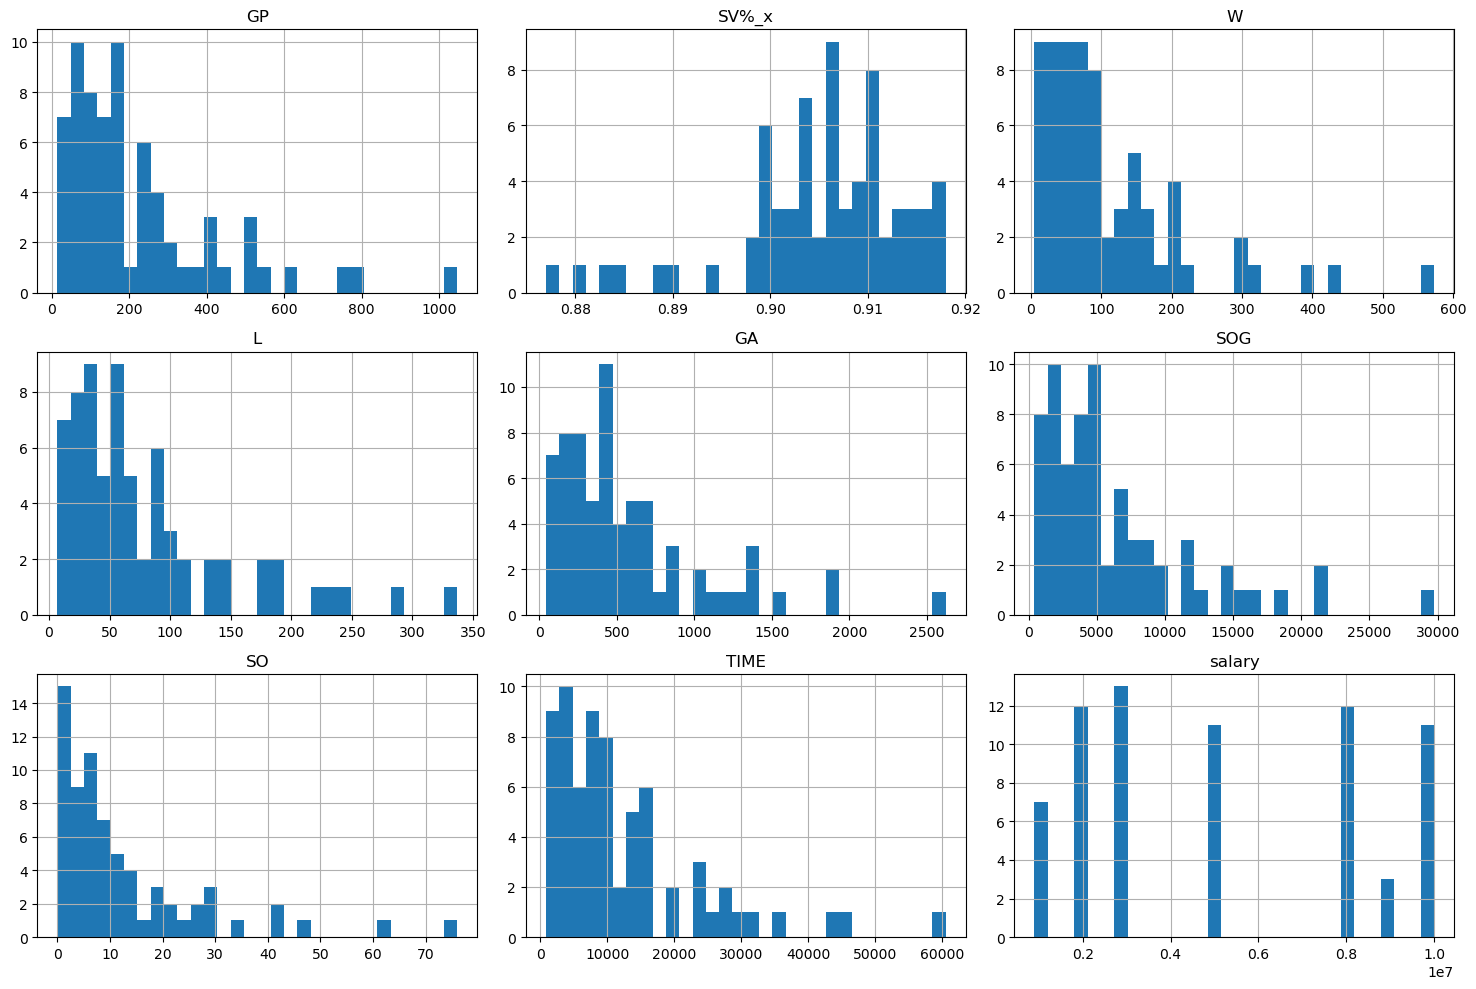

In [836]:
# Plot histograms for numerical features
goalies.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

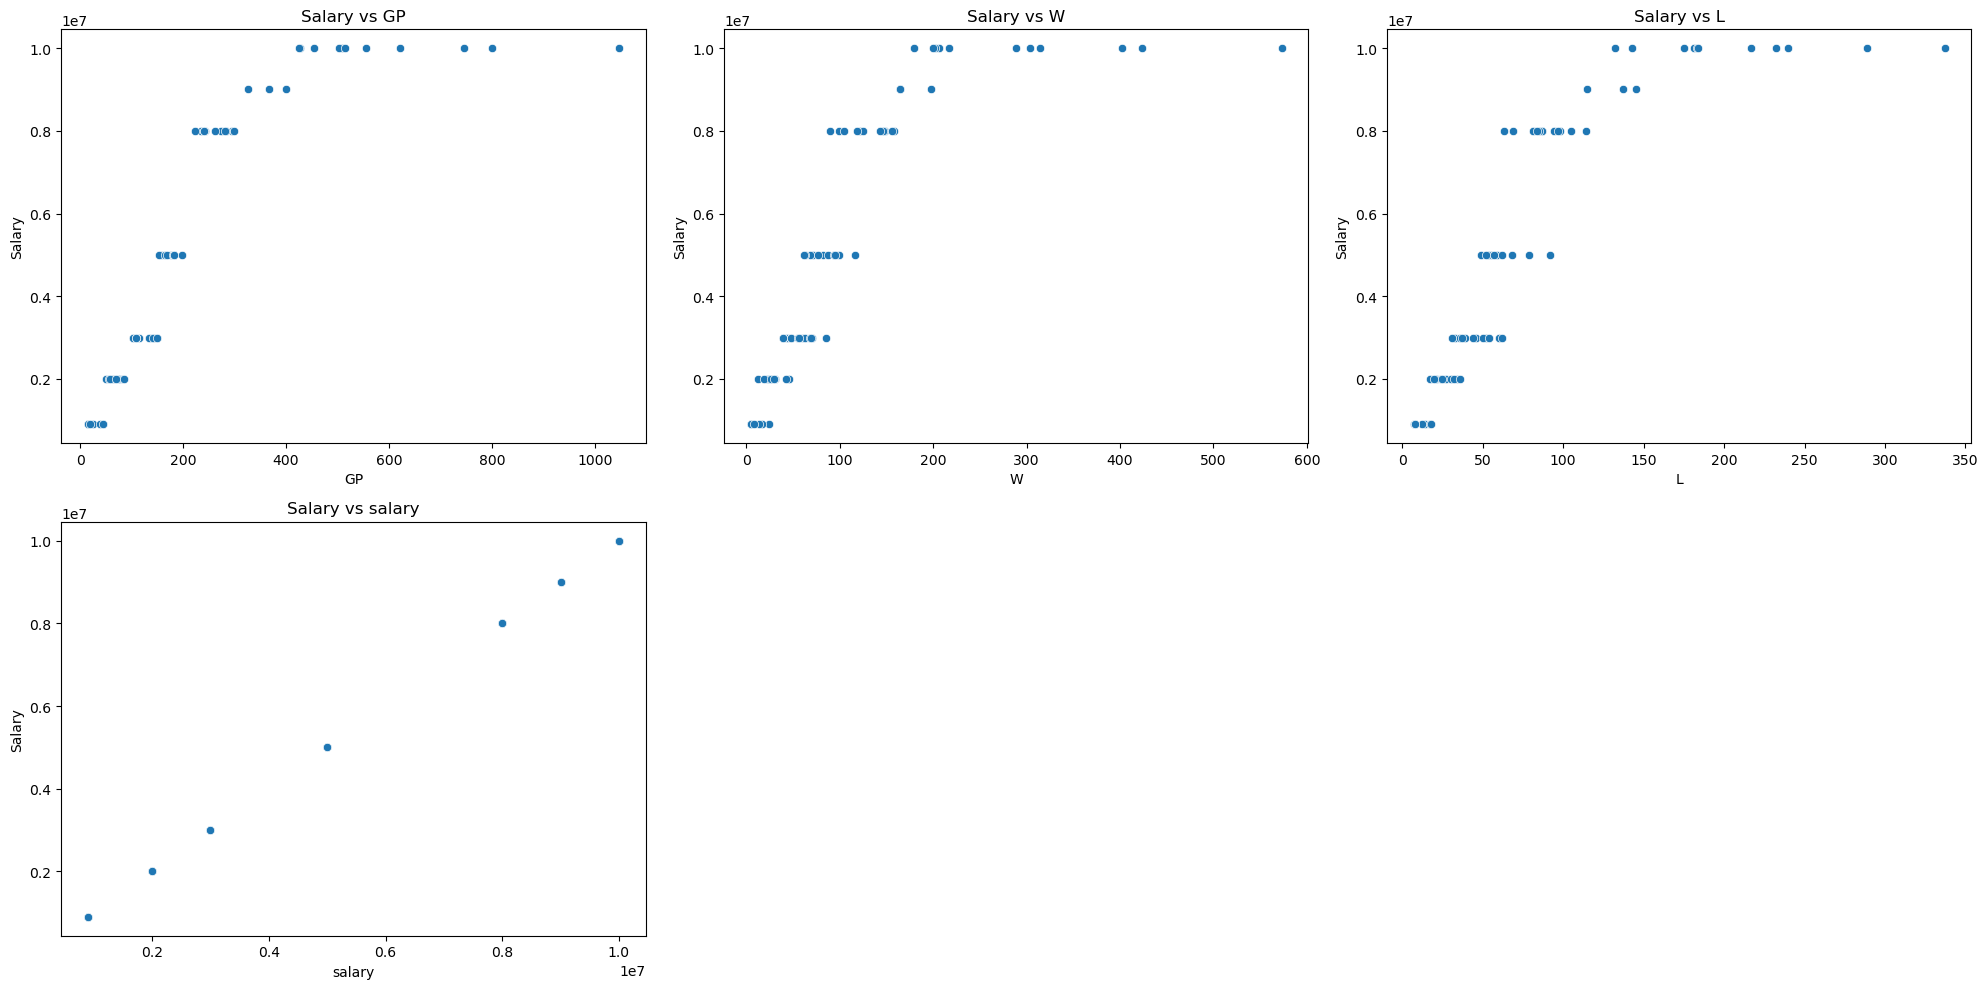

In [837]:
# Scatter plot for Salary vs other numerical features
features = ['GP', 'W', 'L', 'salary']

# Create a grid of subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=goalies[feature], y=goalies['salary'], ax=axes[i])
    axes[i].set_title(f'Salary vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Salary')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [838]:
time = goalies[goalies['TIME'] > 35000]
time

,name,GP,SV%_x,W,L,GA,SOG,SO,TIME,salary
6,"Bobrovsky, Sergei",745.0,0.914,424.0,240.0,1849.0,21594.0,48.0,42978.0,10000000
17,"Fleury, Marc-Andre",1047.0,0.912,573.0,337.0,2622.0,29745.0,76.0,60531.0,10000000
47,"Quick, Jonathan",801.0,0.911,402.0,289.0,1929.0,21590.0,63.0,46482.0,10000000
64,"Varlamov, Semyon",621.0,0.916,289.0,232.0,1572.0,18623.0,41.0,35629.0,10000000


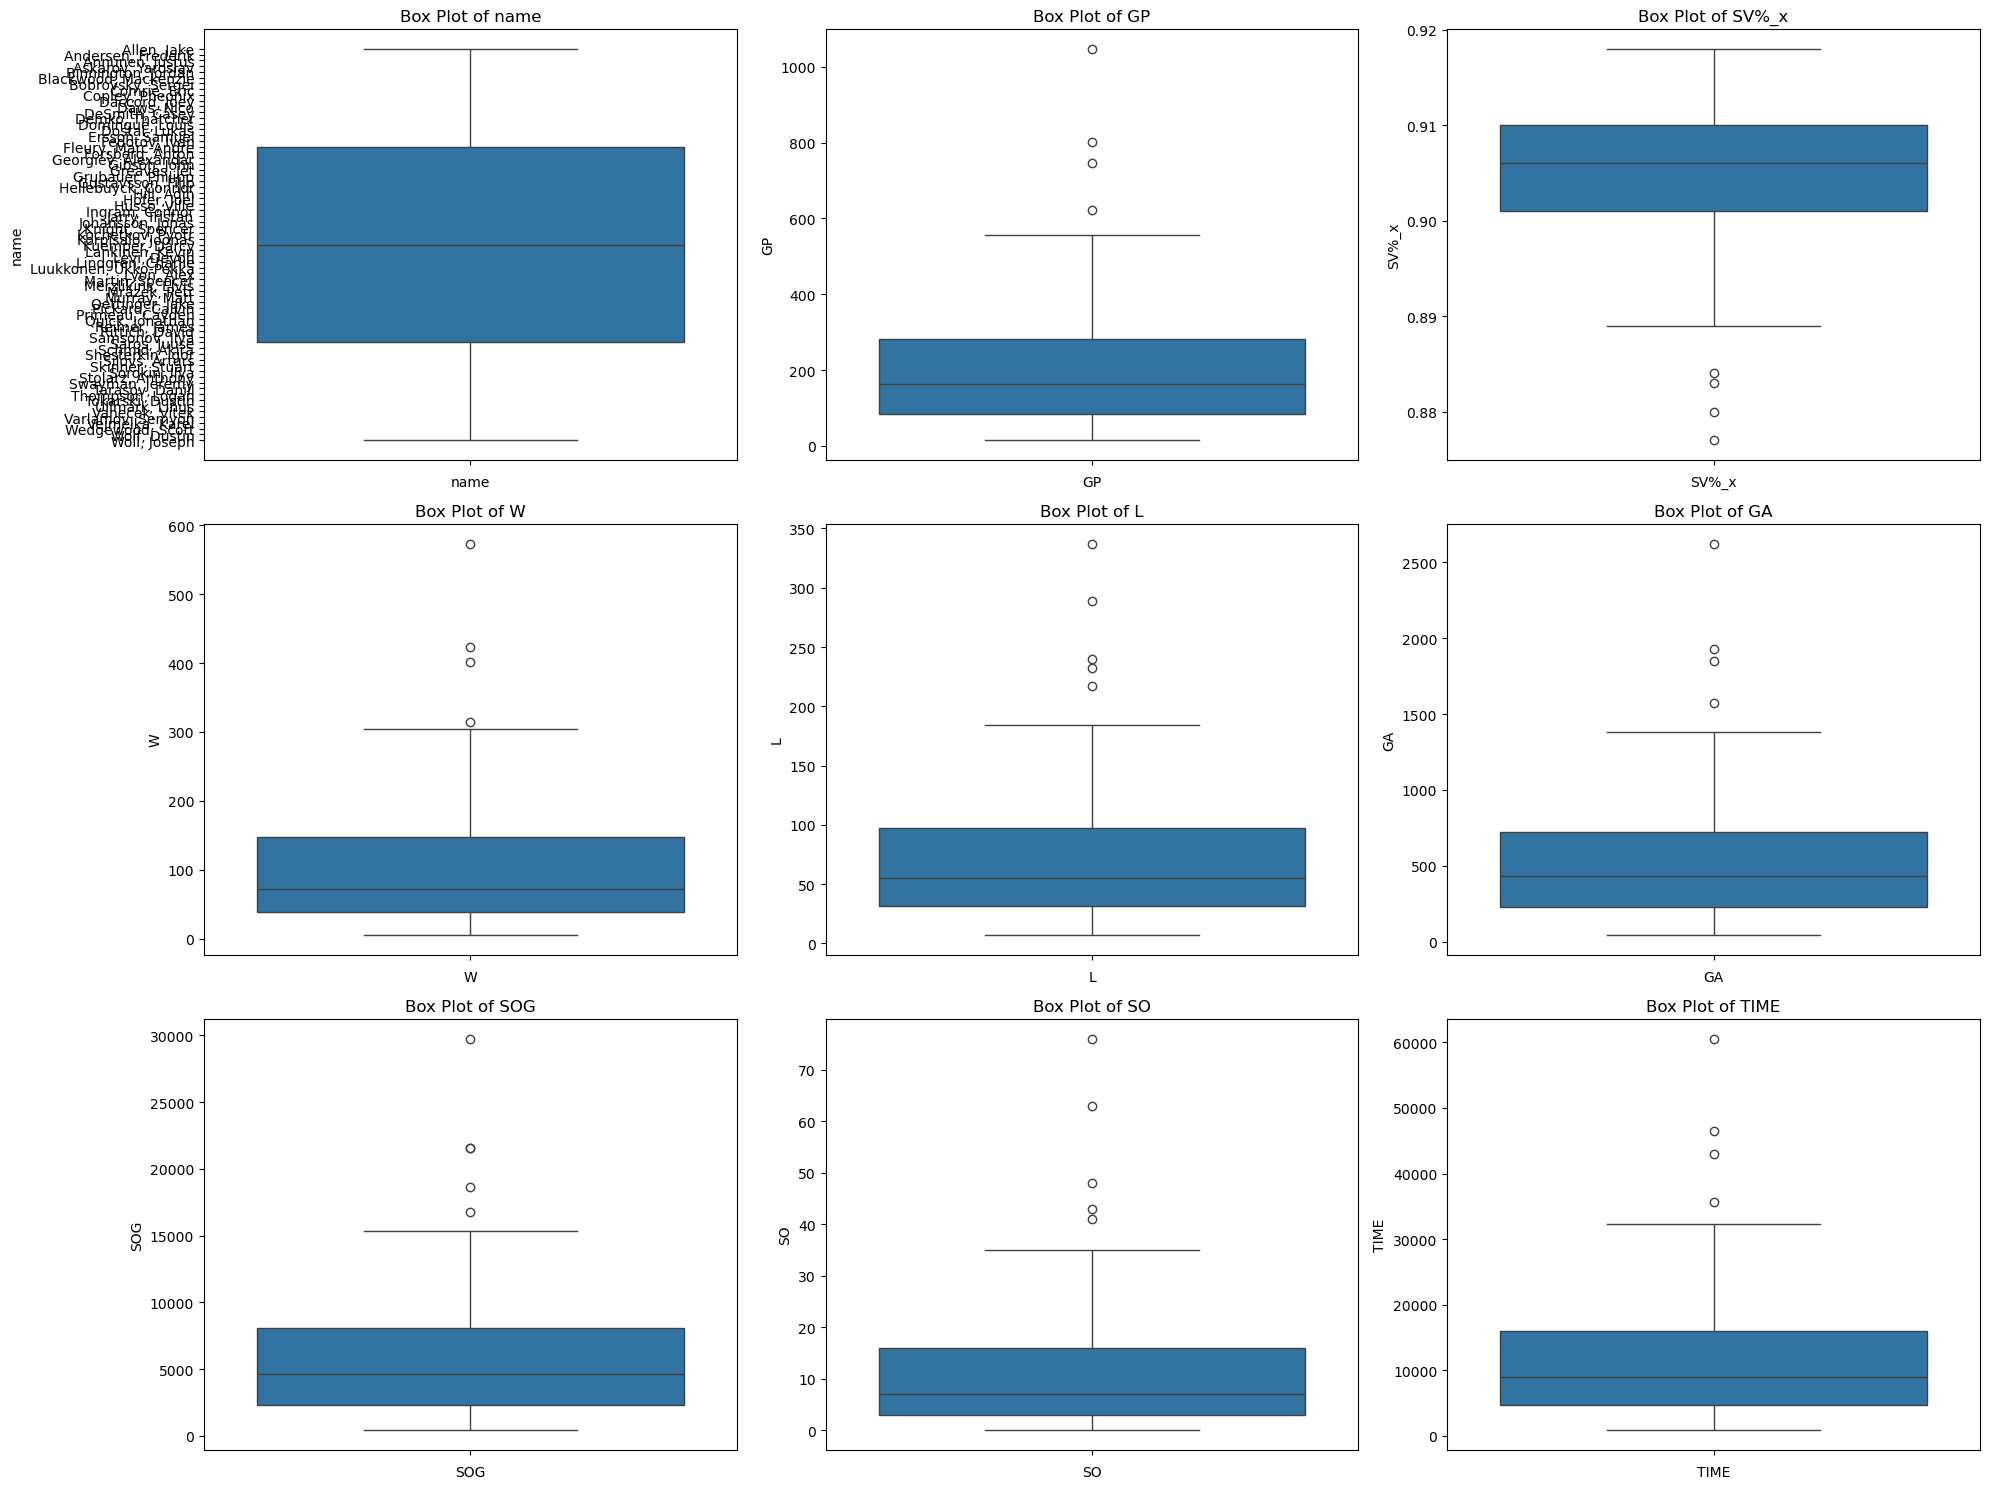

In [839]:
# Define the features to plot
features = goalies.columns.drop('salary')  # Exclude the target variable 'salary'

# Create a grid of subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.boxplot(y=goalies[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [840]:
goalies_test = goalies.drop(columns=['name'])
# Define the features and target
features = goalies_test.columns.drop('salary')
X = goalies_test[features]
y = goalies_test['salary']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [841]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratio: [0.89706669 0.08821986]
Cumulative explained variance: [0.89706669 0.98528655]


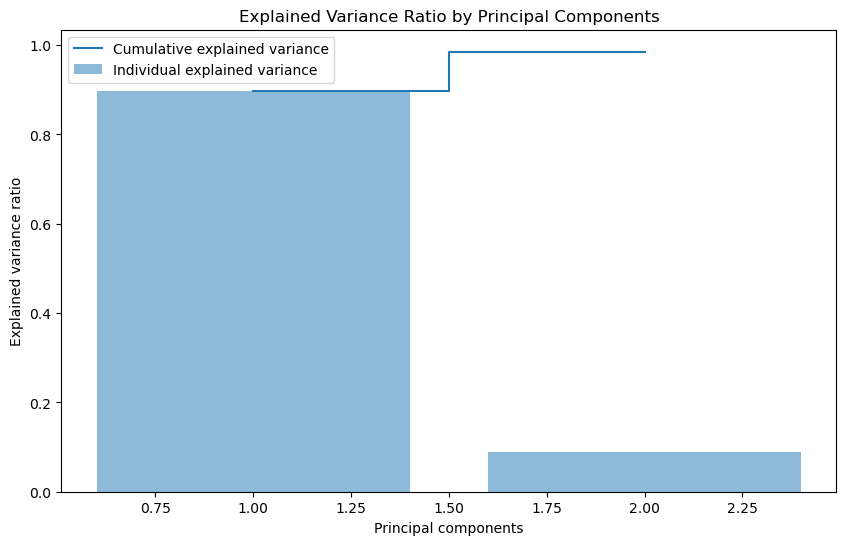

In [842]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [843]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2: {r2_lr}')

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2: {r2_rf}')

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R2: {r2_xgb}')

# Compare Model Performance
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse_lr, mse_rf, mse_xgb]
r2_scores = [r2_lr, r2_rf, r2_xgb]
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R2': r2_scores})
print(performance_df)

Linear Regression MSE: 3622050082691.911
Linear Regression R2: 0.5891656156205933
Random Forest MSE: 119736285714.28572
Random Forest R2: 0.9864188009259259
XGBoost MSE: 229285855232.0
XGBoost R2: 0.9739930629730225
               Model           MSE        R2
0  Linear Regression  3.622050e+12  0.589166
1      Random Forest  1.197363e+11  0.986419
2            XGBoost  2.292859e+11  0.973993


In [844]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


In [845]:
# Train XGBoost model with best parameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [846]:
# Predict on test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R2: {r2_xgb}')

XGBoost MSE: 146128044032.0
XGBoost R2: 0.9834253191947937


In [847]:
# Define the output directory
output_dir = '/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/models'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the model
model_path = os.path.join(output_dir, 'best_xgb_model_goalie.pkl')
joblib.dump(best_xgb_model, model_path)
print(f"Model saved to {model_path}")

Model saved to /Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/models/best_xgb_model_goalie.pkl


In [848]:
# Define the model path
model_path = '/Users/blairjdaniel/lighthouse/lighthouse/NHL/NHL_points_projection/models/best_xgb_model_goalie.pkl'

# Load the trained XGBoost model
best_xgb_model = joblib.load(model_path)

In [849]:
# Merge the DataFrames on a common key (e.g., 'player_id' or 'name')
goalies_to_predict = goalies_to_predict.merge(goalies[['name', 'salary']], on='name', how='left', suffixes=('', '_drop'))

# Drop the duplicate columns if they exist
goalies_to_predict = goalies_to_predict.loc[:, ~goalies_to_predict.columns.str.endswith('_drop')]

# Display the first few rows of the updated DataFrame
goalies_to_predict.drop(columns=['Unnamed: 0'])

goalies_to_predict = goalies_to_predict[goalies_to_predict['salary'].isnull()]


In [850]:
goalies_to_predict_copy = goalies_to_predict.copy()

In [851]:
# Drop the name col from the df
goalies_to_predict = goalies_to_predict.drop(columns=['name', 'salary'])

# Define the features (assuming the same features as used during training)
features = goalies_to_predict.columns

# Scale the features using the same scaler used during training
scaler = StandardScaler()
X_to_predict_scaled = scaler.fit_transform(goalies_to_predict[features])

In [852]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_to_predict_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratio: [0.85733266 0.12477578]
Cumulative explained variance: [0.85733266 0.98210843]


In [853]:
# Predict salaries using the loaded model
predicted_salaries = best_xgb_model.predict(X_to_predict_scaled)

# Add the predicted salaries to the DataFrame
goalies_to_predict['predicted_salary'] = predicted_salaries


In [854]:
goalies_predicted = goalies_to_predict_copy[['name']].copy()
goalies_predicted['predicted_salary'] = predicted_salaries

goalies_predicted.head(50)

,name,predicted_salary
0,"Dell, Aaron",922376.1875
3,"Montoya, Al",922376.1875
4,"Auld, Alex",922376.1875
6,"Nedeljkovic, Alex",922376.1875
7,"Stalock, Alex",922376.1875
9,"York, Allen",922376.1875
10,"Lindback, Anders",922376.1875
11,"Nilsson, Anders",922376.1875
12,"Hammond, Andrew",922376.1875
13,"Raycroft, Andrew",922376.1875
